In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, scipy.stats as stats
%matplotlib inline
import pylab, os, pydotplus, warnings, statsmodels.api as sm
import statsmodels.formula.api as smf, statsmodels.stats.api as sms, statsmodels.tsa.api as smt
warnings.filterwarnings('ignore')
from scipy import stats
from math import sqrt
from sklearn import linear_model, metrics, preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import ttest_1samp
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from sklearn.externals.six import StringIO
from mlxtend.feature_selection import sequential_feature_selector, SequentialFeatureSelector as sfs
from mlxtend.evaluate import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from vecstack import stacking
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
import numpy as np
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn import svm #support vector Machine
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [14]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [17]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [19]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [36]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['smoker'] = le.fit_transform(df['smoker'])
df['sex'] = le.fit_transform(df['sex'])
df['region'] = le.fit_transform(df['region'])

In [26]:
df['smoker'].head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [29]:
df.shape

(1338, 7)

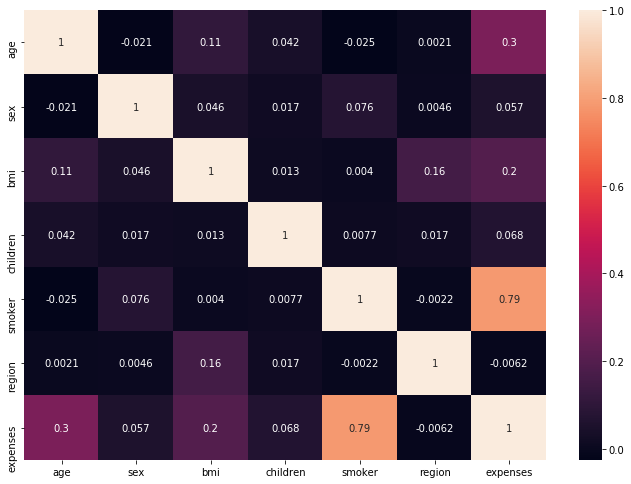

In [87]:
fig,ax= plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(df.corr(),annot=True)
plt.savefig('ins')

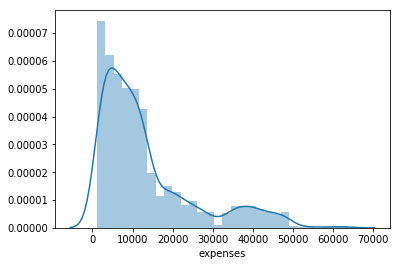

In [24]:
sns.distplot(df['expenses'])

The data is right skewed which means the data on the right side is less when compared with left. Most of
expenses lies within 20000 range.

# smoker and non smoker

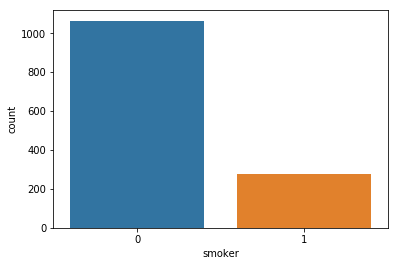

In [28]:
sns.countplot(df['smoker'])

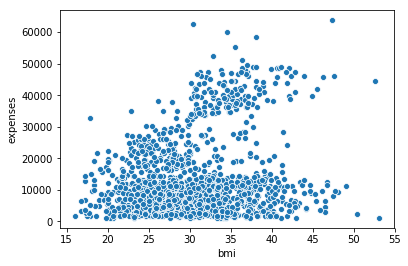

In [30]:
sns.scatterplot(x=df['bmi'], y=df['expenses'])

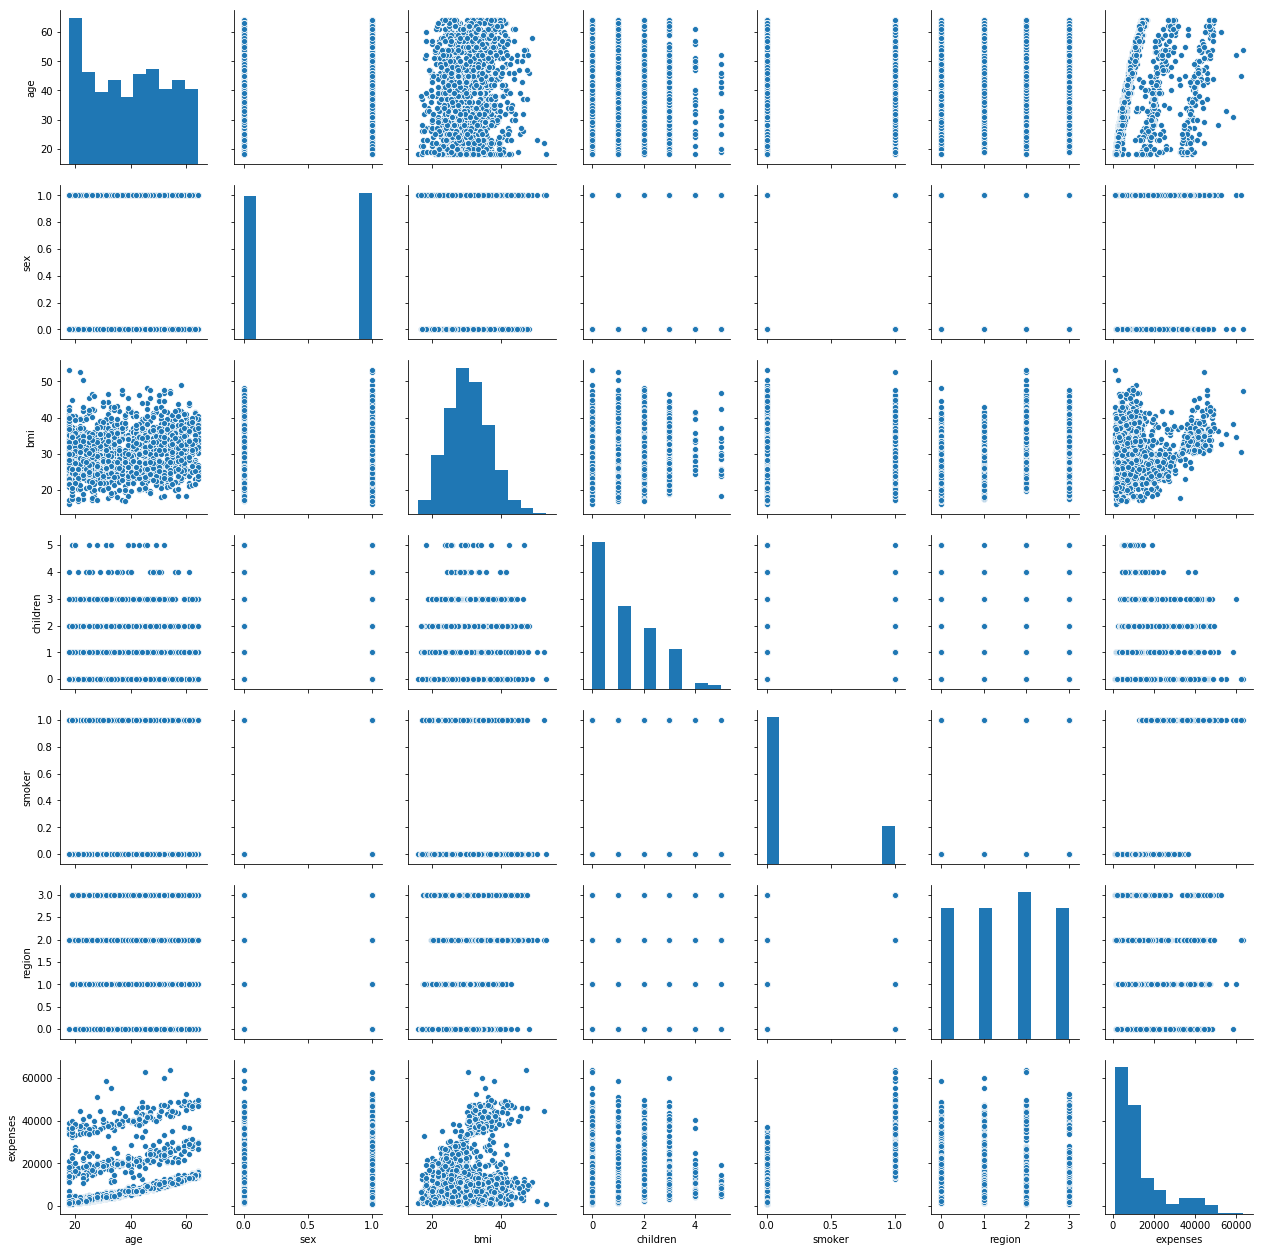

In [39]:
sns.pairplot(df)

In [54]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [58]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [59]:
cat_col=['smoker','region','sex']

In [66]:
for i in cat_col:
    df[i] = label_encoder.fit_transform(df[i])

In [61]:
X = df.drop('expenses', axis=1)
y = df['expenses']

In [62]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [67]:
model = LinearRegression()

In [68]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
# Print Model intercept and co-efficent
print("Model intercept",model.intercept_,"Model co-efficent",model.coef_)

Model intercept -11827.690243440857 Model co-efficent [  256.54688301   -49.5556959    329.03829593   479.33098055
 23399.22241438  -276.24306229]


In [71]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [84]:
# Print various metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

print("Predicting the train data")
train_predict = model.predict(X_train)
print("Predicting the test data")
test_predict = model.predict(X_test)
print("MAE")
print("Train : ",mean_absolute_error(y_train,train_predict))
print("Test  : ",mean_absolute_error(y_test,test_predict))
print("====================================")
print("MSE")
print("Train : ",mean_squared_error(y_train,train_predict))
print("Test  : ",mean_squared_error(y_test,test_predict))
print("====================================")
import numpy as np
print("RMSE")
print("Train : ",np.sqrt(mean_squared_error(y_train,train_predict)))
print("Test  : ",np.sqrt(mean_squared_error(y_test,test_predict)))
print("====================================")
print("R^2")
print("Train : ",r2_score(y_train,train_predict))
print("Test  : ",r2_score(y_test,test_predict))

Predicting the train data
Predicting the test data
MAE
Train :  4249.974832951803
Test  :  4013.5473513742763
MSE
Train :  37969556.20615021
Test  :  33304881.694371685
RMSE
Train :  6161.9441904442965
Test  :  5771.038181676819
R^2
Train :  0.7306860719626136
Test  :  0.791151983192236


In [85]:
train_predict

array([ 2069.03359585,  8141.36511348, 18755.9087006 ,  7870.74055918,
        6319.77323677,  2023.31256548, 26863.42450343, 14926.51215619,
       10495.85929889, 16242.86056466, 11725.99370507, 11281.93339827,
       39310.00037015,  5826.58193988, 12319.08622599,  3157.93965299,
       15407.40958383,  4638.61198466,  5019.75698033,  6017.49314695,
       15364.9402173 ,  8973.68891998,  8767.32720772, 34224.46402602,
        6693.75646855, 26942.08473102, 27280.87272357, 15486.58742309,
        8811.58410991, 34400.26712291, 10167.16501979,  3890.92199565,
       15617.85872463, 29573.33802913, 29452.02427532, 28118.40509054,
       10015.30321546, 33055.63888237,  3963.91622151, 25447.54101793,
        5661.55997897, 27993.48459099,  7049.83736756, 15106.48019776,
        2569.47001823, 35456.58856451, 15254.19868735,  3190.8761776 ,
        1785.54434704, 10139.73090613,  9948.63660039, 11220.24742389,
       16775.5017179 ,  4325.19567694,  1904.54981552,  4172.84106372,
      